In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Database import
con =sqlite3.connect('sample.db')

In [3]:
#Tables Extraction from Database
products=pd.read_sql_query('SELECT * FROM products',con) 
segments=pd.read_sql_query('SELECT * FROM segments',con)
transactions=pd.read_sql_query('SELECT * FROM transactions',con)

In [4]:
#data type updation
segments['update_at']=pd.to_datetime(segments['update_at'])
transactions['trans_dt']=pd.to_datetime(transactions['trans_dt'])

In [5]:
#JONING information from segments & products tables to transactions table to combine all information
df= pd.read_sql_query('''SELECT seg.seg_name,products.category,(transactions.item_price*transactions.item_qty) AS 'revenue', transactions.trans_dt
    FROM 'transactions'
    LEFT JOIN 'products' ON transactions.prod_id=products.prod_id
    LEFT JOIN (SELECT * 
    FROM (SELECT cust_id, update_at, seg_name 
    FROM 'segments'
    WHERE active_flag ='Y'
    ORDER BY cust_id, update_at DESC)
    GROUP BY cust_id) AS seg ON transactions.cust_id=seg.cust_id
    ORDER BY transactions.cust_id, transactions.prod_id''',con)
df['trans_dt']=pd.to_datetime(df['trans_dt'])

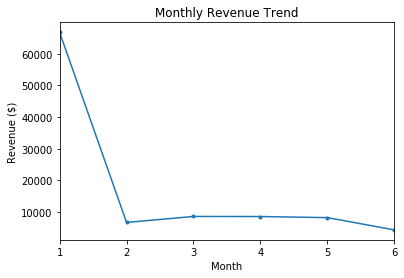

In [6]:
#Monthly Revenue Trend Table Set up and Graph
df1=df.groupby(pd.DatetimeIndex(df['trans_dt']).month)['revenue'].sum().reset_index()
ax1=df1.plot.line(x='trans_dt', y='revenue', title='Monthly Revenue Trend',style='.-',legend=False)
ax1.set_xlabel("Month")
ax1.set_ylabel("Revenue ($)")
plt.savefig("graph.png")

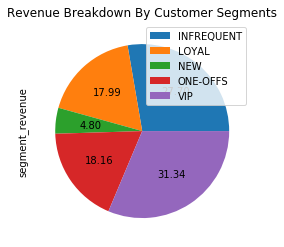

In [7]:
#Total Revenue Breakdown for the given period by Customer Segments Table Set up and Graph
df5=df.groupby(by='seg_name').agg(segment_revenue=('revenue','sum'))
ax5=df5.plot.pie(y='segment_revenue',title='Revenue Breakdown By Customer Segments',autopct='%.2f',labels=None)

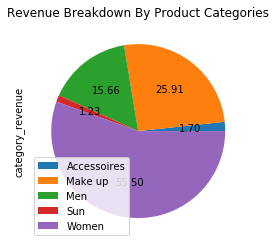

In [8]:
#Total Revenue Breakdown for the given period by Product Categories Table Set up and Graph
df6=df.groupby(by='category').agg(category_revenue=('revenue','sum'))
ax6=df6.plot.pie(y='category_revenue',autopct='%.2f',labels=None,title='Revenue Breakdown By Product Categories')

Text(0, 0.5, 'Revenue ($)')

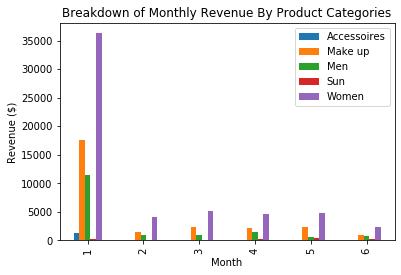

In [9]:
#Breakdown of Monthly Revenue by Product Category Table Set up and Graph
df2=pd.pivot_table(df, values='revenue', index=[pd.DatetimeIndex(df['trans_dt']).month],columns='category',aggfunc='sum')
df2.columns.name = None 
df2 = df2.reset_index() 
ax2=df2.plot.bar(x='trans_dt', y=df2.drop(['trans_dt'], axis=1).columns.values,title='Breakdown of Monthly Revenue By Product Categories')
ax2.set_xlabel("Month")
ax2.set_ylabel("Revenue ($)")

Text(0, 0.5, 'Revenue ($)')

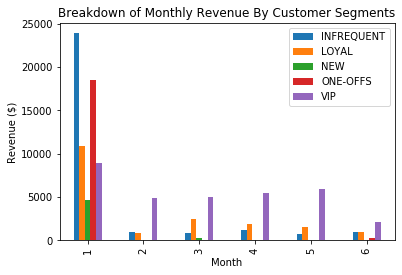

In [10]:
#Breakdown of Monthly Revenue by Customer Segments Table Set up and Graph
df3=pd.pivot_table(df, values='revenue', index=[pd.DatetimeIndex(df['trans_dt']).month], columns='seg_name',aggfunc='sum')
df3.columns.name = None 
df3 = df3.reset_index() 
ax3=df3.plot.bar(x='trans_dt', y=df3.drop(['trans_dt'], axis=1).columns.values,title='Breakdown of Monthly Revenue By Customer Segments')
ax3.set_xlabel("Month")
ax3.set_ylabel("Revenue ($)")

In [11]:
query = open('Question 4.sql', 'r')
Q4=pd.read_sql_query(query.read(),con)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

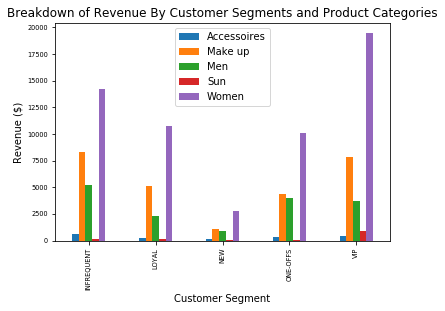

In [12]:
#Breakdown of Revenue By Customer Segments and Product Categories
group=pd.pivot_table(Q4, values='revenue', index=['seg_name'],columns='category', aggfunc='sum')
group.columns.name = None 
group = group.reset_index()
ax4=group.plot.bar(x='seg_name', y=group.drop(['seg_name'], axis=1).columns.values,title='Breakdown of Revenue By Customer Segments and Product Categories',fontsize=6.6)
ax4.set_xlabel("Customer Segment")
ax4.set_ylabel("Revenue ($)")
plt.xticks(rotation=90)

Text(0, 0.5, 'No. of Customers')

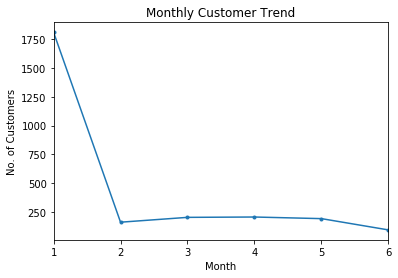

In [13]:
#No of Customers per month
df4=df.groupby(pd.DatetimeIndex(df['trans_dt']).month)['seg_name'].count().reset_index()
ax4=df4.plot.line(x='trans_dt', y='seg_name', title='Monthly Customer Trend',style='.-',legend=False)
ax4.set_xlabel("Month")
ax4.set_ylabel("No. of Customers")